In [ ]:
# ndarray对象
import numpy as np
a = np.array([1,2,3])
print(type(a))

print("ndim:" + str(a.ndim) +"\nsize:" + str(a.size) + "\nshape:" + str(a.shape))

b = np.array([[1.3, 2.4], [0.3, 4.1]])
b.dtype
print("ndim:" + str(b.ndim) +"\nsize:" + str(b.size) + "\nshape:" + str(b.shape))

e = np.array([[1,2,3],(4,5,6),[7,8,9]])
e

In [ ]:
import numpy as np
f = np.array([[1,2,3], [4,5,6]], dtype=complex)
f

In [ ]:
import numpy as np
np.zeros((3,3))
np.arange(0,10)

#help(np.arange)
np.arange(0, 10, 2)

np.arange(0,12).reshape(3,4)

np.linspace(0,10,5)

np.random.random(3)
np.random.random((3,3))

In [ ]:
# 
import numpy as np
import pandas as pd

data = pd.read_csv('monthly_csv_2.csv') # 读取csv文件
print(data)
print(type(data))
print("=============================================")
data = pd.read_csv('monthly_csv.csv', usecols=[0, 1, 2])
ret = data.sort_values(by='Value', ascending=False) # 根据value值降序
print(ret)
print("=============================================")
ret = data[(data['Value'] > 0.889)] # value值大于0.889
print(ret)
print("=============================================")
data_of_china = ret[ret['Country'] == 'China'] # 过滤Country为China的数据
print(data_of_china['Value'])
print("=============================================")
data_of_china = data[(data['Value'] > 0.889) & (data['Country'] == 'China')] # 过滤Country为China的数据
print(data_of_china)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
# mpl.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

# 获取所有sum
data = pd.read_csv('res/monthly_csv.csv')

def get_value_from_data(data):
    """从dataframe中获取value列表"""
    list_v1 = []
    for value in data['Value']:
        list_v1.append(value)
        
    return list_v1

print("==================获取所有国家==================")
# 获取所有国家
ser_all_country = data.drop_duplicates(['Country']).reset_index(drop=True)['Country']
print("国家总数：" + str(len(ser_all_country)) + "个")
# print(ser_all_country['Country'])


print("==================获取Australia总和和平均值==================")
# 获取对应Australia国家的总和
print(data[(data['Country'] == ser_all_country[0])]['Value'].sum())
print(data[(data['Country'] == ser_all_country[0])]['Value'].mean())

print("==================获取所有国家的总和数据==================")
dict_sum = {}
for country in ser_all_country:
    dict_sum[country] = (data[(data['Country'] == country)]['Value'])
    
variables = pd.DataFrame(dict_sum)
# variables.plot()


print("==================台湾,中国,澳大利亚 对比走势图==================")

#  长度必须是一致的
ret = data[(data['Country'] == 'Taiwan')][['Date','Value']]
list_tw = get_value_from_data(ret)[:400]
ret = data[(data['Country'] == 'China')][['Date','Value']]
list_ch = get_value_from_data(ret)[:400]
ret = data[(data['Country'] == 'Australia')][['Date','Value']]
list_aus = get_value_from_data(ret)[:400]

variables = pd.DataFrame({'China': np.array(list_ch),
                         'Taiwan': np.array(list_tw),
                         'Australia': np.array(list_aus)})
variables.plot()

In [ ]:
# print("==================画Australia的走势图==================")
# ret = data[(data['Country'] == 'Australia')]
# print(ret)
# rest_a = pd.Series(ret['Value'], index=ret['Date'])
# rest_a.plot(kind='bar', x=list_country)

In [ ]:
plt.plot([1,2,3,4])

In [ ]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%Y-%m')
events = [datetime.date(2015,1,23),
         datetime.date(2015,1,28),
         datetime.date(2015,2,3),
         datetime.date(2015,2,21),
         datetime.date(2015,3,15),
         datetime.date(2015,3,24),
         datetime.date(2015,4,8),
         datetime.date(2015,4,24)]
readings = [12,22,25,20,18,15,17,14]
fig, ax = plt.subplots()
plt.plot(events, readings)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)

In [ ]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib as mpl
# mpl.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

def get_value_from_data(data, key):
    """从dataframe中获取value列表"""
    list_v = []
    for value in data[key]:
        list_v.append(value)
        
    return list_v


def get_age_from_birth(data):
    import datetime as dt
    now_year =dt.datetime.today().year  #当前的年份
    data['age']=now_year-data.Birth.dt.year
    return data

# 读取csv文件
data = pd.read_csv('res/worldcup_team_csv.csv')
# data = pd.read_table('res/worldcup_team_csv.csv', sep=',')


data['Birth'] = pd.to_datetime(data['Birth'])
data = get_age_from_birth(data)

frame_data_russia = data[data['Country'] == 'Russia'];
frame_data_egypt = data[data['Country'] == 'Egypt'];

list_age = get_value_from_data(data[data['Country'] == 'Russia'][['age']], 'age')
list_age_egypt = get_value_from_data(frame_data_egypt, 'age')

variables = pd.DataFrame({'Russia': np.array(list_age),
                         'Egypt': np.array(list_age_egypt)})
variables.plot(kind='line')





In [ ]:
# 读取csv文件
# 没有表头，使用header选项，将其值置为None,pandas会为其添加默认表头
data = pd.read_csv('res/worldcup_team_csv.csv', header=None) 
# 可以指定表头
data = pd.read_csv('res/worldcup_team_csv.csv', names=['white','red','blue','green','animal']) 
print(data)

In [ ]:
# 创建等级结构的DataFrame对象
# 把所有想转换为索引的列名称赋给index_col
pd.read_csv('res/myCSV_03.csv', index_col=['color','status'])

In [ ]:
# pd.read_table('res/ch05_05.txt', sep='\D*', names=['white','red','blue'])
pd.read_table('res/ch05_05.txt', sep='\D*', names=['white','red','blue'], skiprows=[3])

##### 

In [ ]:
pd.read_table('res/ch05_06.txt', sep=',', skiprows=[0,1,3,6])

In [ ]:
# 从txt文件读取部分数据
# 过滤第2行，从起始行往后读3行
pd.read_csv('res/ch05_02.csv',sep=',', skiprows=[2], nrows=3, header=None)

In [ ]:
out = pd.Series() # 每隔3行进行累加，并且把和插入到series对象中
i = 0
pieces = pd.read_csv('res/ch05_01.csv', chunksize=3)
for piece in pieces:
    print(piece['white'])
    out.at[i] = piece['white'].sum()
    i = i + 1

out

In [ ]:
my_frame = pd.DataFrame({
    'ball':[0,4,8,12],
    'pen':[1,5,9,13],
    'pencil':[2,6,10,14],
    'paper':[3,7,11,15]
})
# 写入文件的时候，取消index和header选项
my_frame.to_csv('res/ch05_07.csv', index=False, header=False)

# 同理对DataFrame对象
frame1 = pd.DataFrame(np.arange(16).reshape((4,4)),
                     index=['red', 'blue', 'yellow', 'white'],
                     columns=['ball', 'pen', 'pencil', 'paper'])
print(frame1)
frame2 = pd.DataFrame(np.arange(12).reshape((4,3)),
                     index=['blue', 'green', 'white', 'yellow'],
                     columns=['mug', 'pen', 'ball'])
print(frame2)
frame3 = frame1+frame2

frame3.to_csv('res/ch05_08.csv', index=False, header=False, na_rep='NaN')


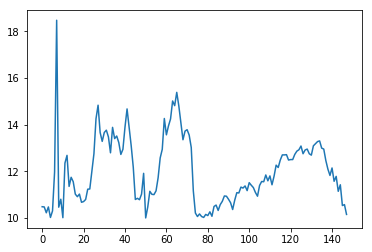

In [136]:
# 天然气数据分析
import numpy as np
import pandas as pd

#  获取原始数据
data = pd.read_csv('res/natural-gas-daily.csv')
frame = pd.DataFrame(data[data['Price']>10.0])

from datetime import datetime
arr_date = frame['Date'].values
# arr_date = [datetime.strptime(arr_date[0], '%Y-%m-%d') ]
# print(arr_date)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%Y-%m')


prices = np.array(frame['Price'])
dates = [datetime.strptime(date, '%Y-%m-%d').date() for date in arr_date]


plt.plot(prices)
plt.show()

# fig, ax = plt.subplots()
# plt.plot(dates, prices)
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(timeFmt)
# ax.xaxis.set_minor_locator(days)


# #设定开始和结束时间
# start=datetime.datetime(2013,1,1)
# stop=datetime.datetime(2013,12,31)
# delta=datetime.timedelta(1)#设定日期的间隔
# dates=mpl.dates.drange(start,stop,delta)# 返回浮点型的日期序列，这个是生成时间序列，同理如果是将序列转成日期呢？
# values=np.random.rand(len(dates))
# #存在两个问题，一个是坐标轴没有按照日期的形式去标注，另一个是刻度的数量和位置也不合适
# fig=plt.figure(figsize=(24,12))#调整画图空间的大小
# plt.plot(dates,prices,linestyle='-',marker='*',c='r',alpha=0.5)#作图
# ax=plt.gca()
# date_format=mpl.dates.DateFormatter('%Y-%m-%d')#设定显示的格式形式
# ax.xaxis.set_major_formatter(date_format)#设定x轴主要格式
# ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(30))#设定坐标轴的显示的刻度间隔
# fig.autofmt_xdate()#防止x轴上的数据重叠，自动调整。


In [ ]:
from datetime import datetime

str_time = '2017-10-02'
print(datetime.strptime(str_time, '%Y-%m-%d').date())
